<a href="https://colab.research.google.com/github/ManalSaad2/portfolio1/blob/main/Project4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px


In [2]:
df = pd.read_excel("/content/Aqar_Riyadh.xlsx")

In [3]:
df.head()

,Property_ID,Property Type,Bedrooms,Bathrooms,Area,Price,Description,Location,District,City,Agency_Name
0,A877409248,دور,6,5.0,214 م2,"730,000","دور للبيع في بدر, جنوب الرياض",بدر، جنوب الرياض، الرياض,حي بدر,الرياض,NaN
1,W448904463,فیلا,5,6.0,440 م2,"4,800,000",فيلا للبيع في الملك فهد، شمال الرياض,الملك فهد، شمال الرياض، الرياض,حي الملك فهد,الرياض,NaN
2,M187516680,فیلا,11,6.0,445 م2,"5,000,000",فيلا للبيع في الوادي، شمال الرياض,الوادي، شمال الرياض، الرياض,حي الوادي,الرياض,NaN
3,H808583263,دور,6,5.0,185 م2,"1,200,000",دور للبيع في المونسية، شرق الرياض,المونسية، شرق الرياض، الرياض,حي المونسية,الرياض,NaN
4,T501925005,فیلا,6,6.0,300 م2,"980,000",فيلا للبيع في بدر، جنوب الرياض,بدر، جنوب الرياض، الرياض,حي بدر,الرياض,مؤسسة غزالة للخدمات العقارية


In [4]:
data=df[['Property Type','Price','Area','District',]]

In [5]:
data

,Property Type,Price,Area,District
0,دور,"730,000",214 م2,حي بدر
1,فیلا,"4,800,000",440 م2,حي الملك فهد
2,فیلا,"5,000,000",445 م2,حي الوادي
3,دور,"1,200,000",185 م2,حي المونسية
4,فیلا,"980,000",300 م2,حي بدر
...,...,...,...,...
1195,شقة,"580,000",124 م2,حي السويدي
1196,فیلا,"4,400,000",496 م2,حي المونسية
1197,شقة,"430,000",131 م2,حي بدر
1198,دور,"740,000",214 م2,حي بدر


In [9]:
data.describe()

,Property Type,Price,Area,District
count,1200,1200,1200,1200
unique,8,288,317,108
top,شقة,"860,000",500 م2,حي بدر
freq,395,74,94,130


In [10]:
data["Price"] = data["Price"].str.replace(',', '', regex=True).astype(int)

data["Area"] = data["Area"].str.replace(',', '', regex=True)
data["Area"] = data["Area"].str.extract('(\d+)').astype(float)
data["Average price per square meter"] = data["Price"] / data["Area"]

<ipython-input-10-8e6060e540a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Price"] = data["Price"].str.replace(',', '', regex=True).astype(int)
<ipython-input-10-8e6060e540a1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Area"] = data["Area"].str.replace(',', '', regex=True)  # Remove commas
<ipython-input-10-8e6060e540a1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [11]:
data

,Property Type,Price,Area,District,Average price per square meter
0,دور,730000,214.0,حي بدر,3411.214953
1,فیلا,4800000,440.0,حي الملك فهد,10909.090909
2,فیلا,5000000,445.0,حي الوادي,11235.955056
3,دور,1200000,185.0,حي المونسية,6486.486486
4,فیلا,980000,300.0,حي بدر,3266.666667
...,...,...,...,...,...
1195,شقة,580000,124.0,حي السويدي,4677.419355
1196,فیلا,4400000,496.0,حي المونسية,8870.967742
1197,شقة,430000,131.0,حي بدر,3282.442748
1198,دور,740000,214.0,حي بدر,3457.943925


In [12]:
plt.figure(figsize=(15,7))
px.scatter(data,x="Property Type",y="Price",color="District")

<Figure size 1500x700 with 0 Axes>

In [13]:
px.pie(data,names="Property Type",values="Price")

<Axes: xlabel='Property Type'>

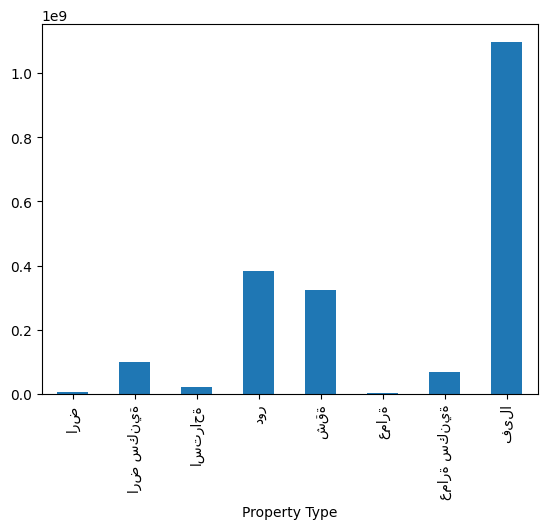

In [14]:
data.groupby("Property Type")["Price"].sum().plot(kind="bar")

In [15]:
data.groupby("Property Type")["Price"].sum().sort_values()

,Price
Property Type,
عمارة,4300000
ارض,4651200
استراحة,22240000
عمارة سكنية,68218000
ارض سكنية,99238355
شقة,323559018
دور,383913399
فیلا,1097178485


In [21]:
df.head().style.set_properties(**{'background-color': 'Black',
                           'color': 'Green',
                           'border-color': 'white'})

,Property_ID,Property Type,Bedrooms,Bathrooms,Area,Price,Description,Location,District,City,Agency_Name
0,A877409248,دور,6,5.000000,214 م2,"730,000","دور للبيع في بدر, جنوب الرياض",بدر، جنوب الرياض، الرياض,حي بدر,الرياض,nan
1,W448904463,فیلا,5,6.000000,440 م2,"4,800,000",فيلا للبيع في الملك فهد، شمال الرياض,الملك فهد، شمال الرياض، الرياض,حي الملك فهد,الرياض,nan
2,M187516680,فیلا,11,6.000000,445 م2,"5,000,000",فيلا للبيع في الوادي، شمال الرياض,الوادي، شمال الرياض، الرياض,حي الوادي,الرياض,nan
3,H808583263,دور,6,5.000000,185 م2,"1,200,000",دور للبيع في المونسية، شرق الرياض,المونسية، شرق الرياض، الرياض,حي المونسية,الرياض,nan
4,T501925005,فیلا,6,6.000000,300 م2,"980,000",فيلا للبيع في بدر، جنوب الرياض,بدر، جنوب الرياض، الرياض,حي بدر,الرياض,مؤسسة غزالة للخدمات العقارية
